In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [8]:
tips = sns.load_dataset('tips')
tips.head() #顯示前五個

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


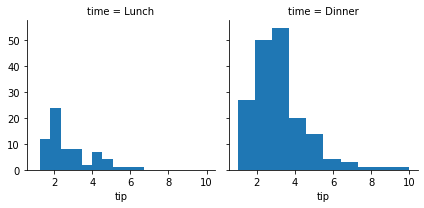

In [14]:
# 如果我的數據要以time 做類別畫圖
g = sns.FacetGrid(tips, col='time')  #sns.FacetGrid(你的df數據, col=你要以哪個column做分類)
g.map(plt.hist,'tip') # map(畫圖的種類,x軸的資訊, y軸的資訊) #hist 是只吃一維的資訊,所以在這邊只有寫一個x=tip的限制

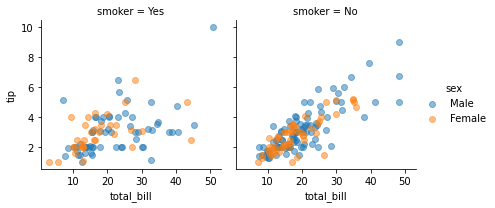

In [19]:
# 畫圖情境: 兩個軸(2 個col), 每一個圖內, 還可以已另一個col去做切分 (hue)
g = sns.FacetGrid(tips,col='smoker', hue = 'sex') #(df , col=第一刀分類, hue = 每一個grid 要再做第二刀分類)
g.map(plt.scatter, 'total_bill', 'tip', alpha = 0.5)
g.add_legend() #秀出右邊的標示

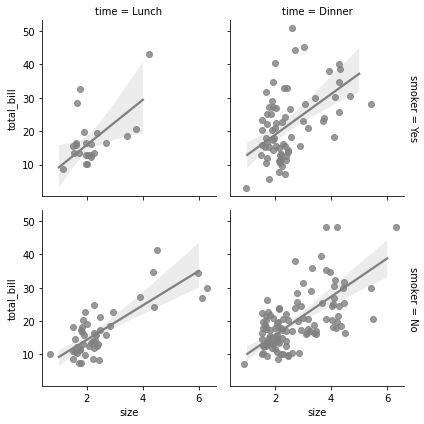

In [28]:
#畫圖情境: 畫四格圖 ,數據要用兩種col去做第一刀切分
g = sns.FacetGrid(tips, col='time', row = 'smoker',margin_titles=True)
g.map(sns.regplot,'size','total_bill', color ='0.5', fit_reg = True, x_jitter=0.5)

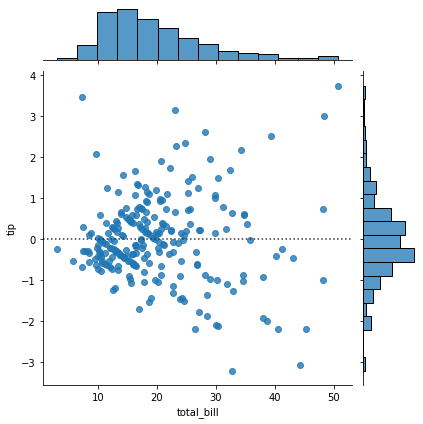

In [34]:
#畫圖情境: 只想畫一個圖,但軸上面有分布圖
kinds= ['scatter','kde','hist','hex','reg','resid' ]
sns.jointplot(data = tips, x='total_bill', y = 'tip', kind = kinds[-1])

C:\Users\10903059\Anaconda3\envs\py39\lib\site-packages\seaborn\axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))
C:\Users\10903059\Anaconda3\envs\py39\lib\site-packages\seaborn\axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


==================我是分隔線================


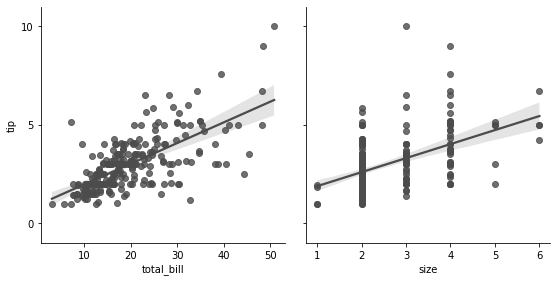

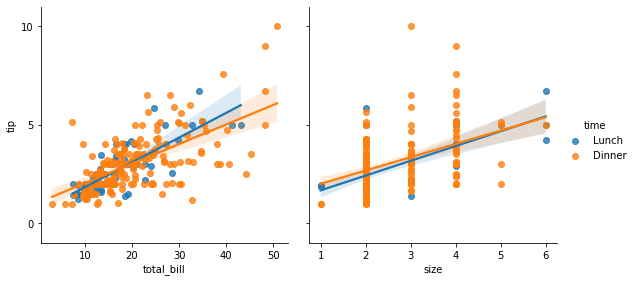

In [57]:
# tip 的數據也針對 PairGrid 做匹配作圖 (我的x y軸都可以設不一樣的col作圖)
g = sns.PairGrid(tips, x_vars=['total_bill','size'], y_vars=['tip'], size = 4)
g.map(sns.regplot , color = '0.3')
g.set(ylim=(-1,11) , yticks = [0,5,10])

print('==================我是分隔線================')
g = sns.PairGrid(tips, x_vars=['total_bill','size'], y_vars=['tip'],size = 4, hue = 'time')
g.map(sns.regplot )
g.set(ylim=(-1,11) , yticks = [0,5,10])
g.add_legend()

In [40]:
# 換個數據
iris = sns.load_dataset('iris')
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


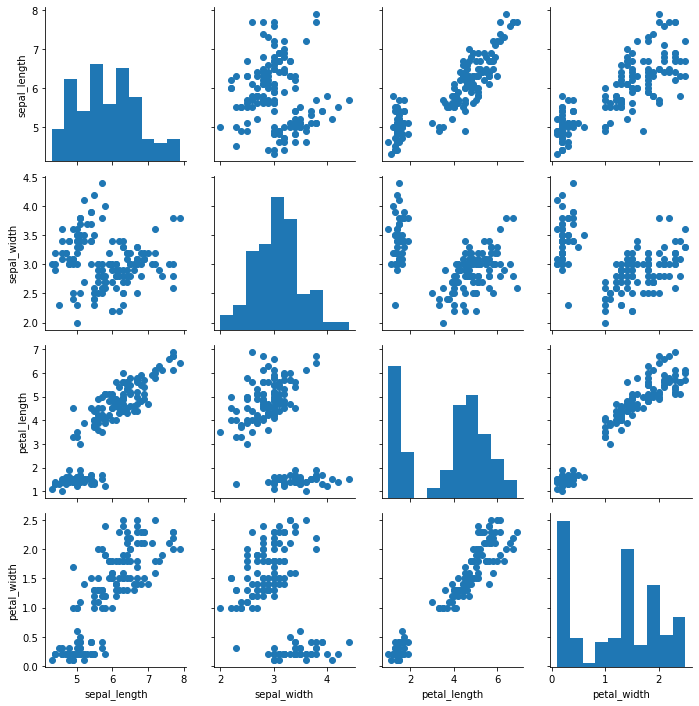

In [44]:
#如果今天我們拿到一個數據, 想要看整體col的綜合關係  #重點: PairGrid 可以針對不同的col做匹配綜合圖
g = sns.PairGrid(iris) 
# g.map(plt.scatter)
#如果對角線的正相關要改成柱狀圖,比較可以知道數據的密集性
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

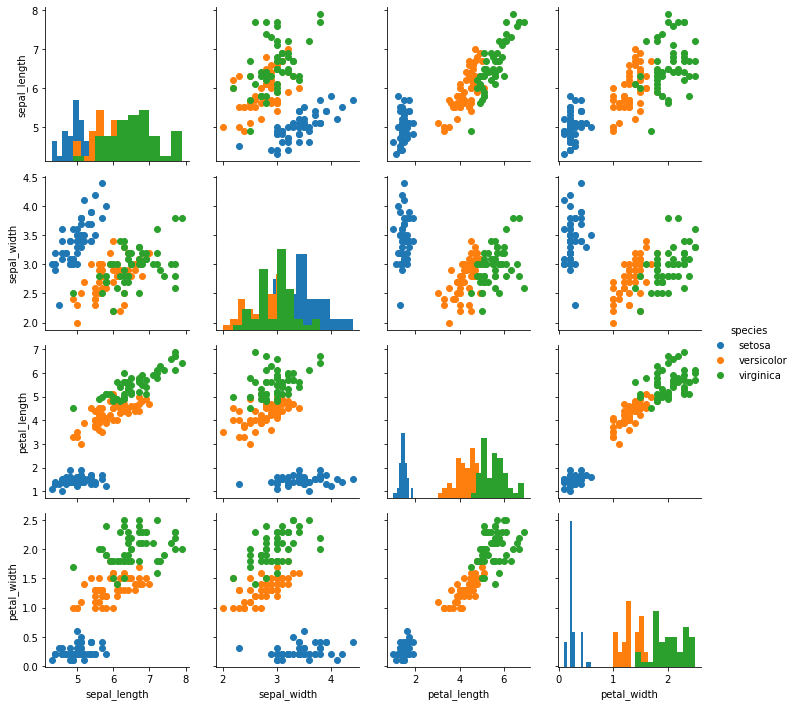

In [46]:
#如何將綜合圖表,每一個grid 做分類? (hue)
g = sns.PairGrid(iris, hue='species')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

C:\Users\10903059\Anaconda3\envs\py39\lib\site-packages\seaborn\distributions.py:1163: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
C:\Users\10903059\Anaconda3\envs\py39\lib\site-packages\seaborn\distributions.py:1163: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
C:\Users\10903059\Anaconda3\envs\py39\lib\site-packages\seaborn\distributions.py:1163: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
C:\Users\10903059\Anaconda3\envs\py39\lib\site-packages\seaborn\distributions.py:1163: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
C:\Users\10903059\Anaconda3\envs\py39\lib\site-packages\seaborn\distributions.py:1163: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
C:\Users\10903059\Anaconda3\envs\py39\lib\site-packages\seaborn\distributions.py:1163: UserWarn

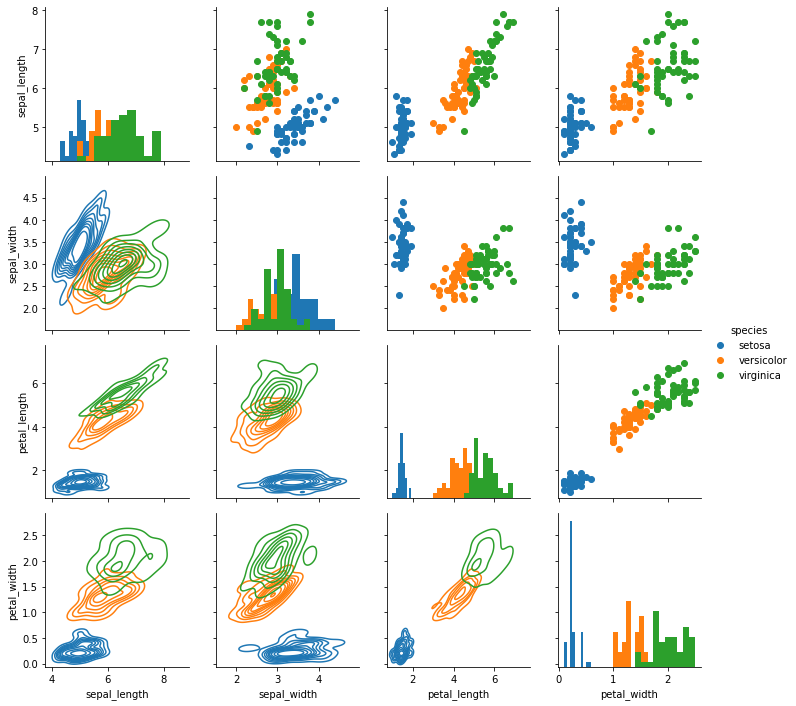

In [66]:
g = sns.PairGrid(iris ,  hue ='species')
g.map_diag(plt.hist)
g.map_lower(sns.kdeplot, cmap = 'blues_d')
g.map_upper(plt.scatter)
g.add_legend()

In [58]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


C:\Users\10903059\Anaconda3\envs\py39\lib\site-packages\seaborn\axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


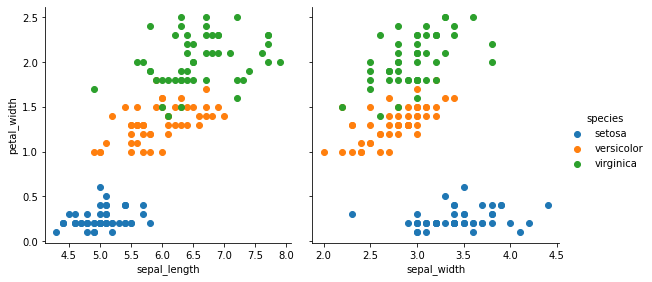

In [64]:
g = sns.PairGrid(iris, x_vars=['sepal_length','sepal_width'], y_vars=['petal_width'],size = 4, hue = 'species')
g.map(plt.scatter)
# g.set(ylim=(-1,11) , yticks = [0,5,10])
g.add_legend()

In [ ]:
#https://blog.mazhangjing.com/2018/03/29/learn_seaborn/
#https://github.com/mwaskom/seaborn-data